In [420]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loda Dataset

In [421]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [422]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Encode datetime

In [423]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second

train["dayofweek"] = train["datetime"].dt.dayofweek

In [424]:
print(train.shape)
train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [425]:
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["hour"]=test["datetime"].dt.hour
test["minute"]=test["datetime"].dt.minute
test["second"]=test["datetime"].dt.second


test["dayofweek"] = test["datetime"].dt.dayofweek

In [426]:
print(test.shape)
test.head()

(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


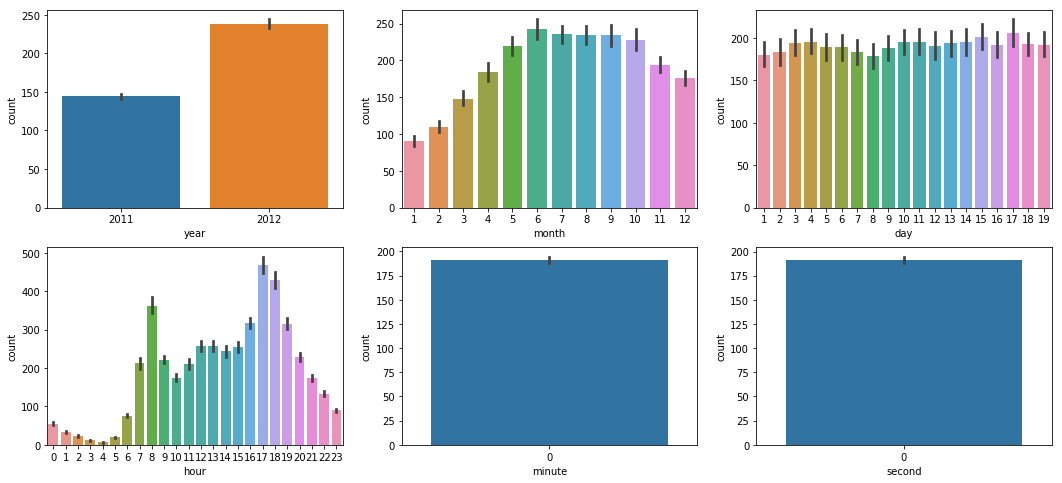

In [427]:
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)


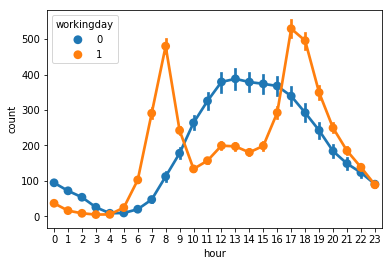

In [428]:
sns.pointplot(data=train,x="hour",y="count",hue="workingday")

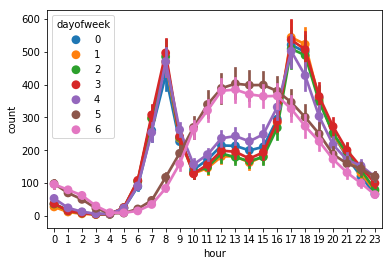

In [429]:
sns.pointplot(data=train,x="hour",y="count",hue="dayofweek")

# Encode season

In [430]:
train["spring"] = train["season"] == 1
train["summer"] = train["season"] == 2
train["fall"] = train["season"] == 3
train["winter"] = train["season"] == 4

print(train.shape)
train[["season","spring","summer","fall","winter"]]

(10886, 23)


,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False
5,1,True,False,False,False
6,1,True,False,False,False
7,1,True,False,False,False
8,1,True,False,False,False
9,1,True,False,False,False


In [431]:
test["spring"] = test["season"] == 1
test["summer"] = test["season"] == 2
test["fall"] = test["season"] == 3
test["winter"] = test["season"] == 4

print(test.shape)
test[["season","spring","summer","fall","winter"]]

(6493, 20)


,season,spring,summer,fall,winter
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False
5,1,True,False,False,False
6,1,True,False,False,False
7,1,True,False,False,False
8,1,True,False,False,False
9,1,True,False,False,False


# Encode weather

In [432]:
train["clear"] = train["weather"] == 1
train["cloudy"] = train["weather"] == 2
train["snow"] = train["weather"] == 3
train["heavysnow"] = train["weather"] == 4

print(train.shape)
train[["weather","clear","cloudy","snow","heavysnow"]]

(10886, 27)


,weather,clear,cloudy,snow,heavysnow
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False
5,2,False,True,False,False
6,1,True,False,False,False
7,1,True,False,False,False
8,1,True,False,False,False
9,1,True,False,False,False


In [433]:
test["clear"] = test["weather"] == 1
test["cloudy"] = test["weather"] == 2
test["snow"] = test["weather"] == 3
test["heavysnow"] = test["weather"] == 4

print(test.shape)
test[["weather","clear","cloudy","snow","heavysnow"]]

(6493, 24)


,weather,clear,cloudy,snow,heavysnow
0,1,True,False,False,False
1,1,True,False,False,False
2,1,True,False,False,False
3,1,True,False,False,False
4,1,True,False,False,False
5,1,True,False,False,False
6,1,True,False,False,False
7,1,True,False,False,False
8,1,True,False,False,False
9,2,False,True,False,False


# Encode windspeed - train

In [434]:
# windspeed 가 0이 아닌 거 train -> 0인 거 predict

In [435]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,second,dayofweek,spring,summer,fall,winter,clear,cloudy,snow,heavysnow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,5,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,5,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,5,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,5,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,5,True,False,False,False,True,False,False,False


In [436]:
feature_names = ["temp","humidity","count","year","month","day",
               "hour","spring","summer","fall","winter","clear","cloudy","snow","heavysnow"]
lable_name = "windspeed"

In [437]:
x_train = train.loc[train["windspeed"]!=0 , feature_names]
x_test = train.loc[train["windspeed"]==0 , feature_names]
print(x_train.shape)
print(x_test.shape)

(9573, 15)
(1313, 15)


In [438]:
y_train = train.loc[train["windspeed"]!=0,lable_name]

In [439]:
#use decision tree
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [440]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [441]:
predictions = model.predict(x_test)

In [442]:
train.loc[train["windspeed"] == 0,"windspeed"] = predictions

In [443]:
train["windspeed"].head()

0    13.40134
1    15.79994
2    13.49983
3    16.00027
4    10.30125
Name: windspeed, dtype: float64

# Encode windspeed -test

In [444]:
feature_names = ["temp","humidity","year","month","day",
               "hour","spring","summer","fall","winter","clear","cloudy","snow","heavysnow"]
lable_name = "windspeed"

In [445]:
x_train = test.loc[test["windspeed"]!=0 , feature_names]
x_test = test.loc[test["windspeed"]==0 , feature_names]

print(x_train.shape)
print(x_test.shape)

x_train.head()

(5626, 14)
(867, 14)


,temp,humidity,year,month,day,hour,spring,summer,fall,winter,clear,cloudy,snow,heavysnow
0,10.66,56,2011,1,20,0,True,False,False,False,True,False,False,False
3,10.66,56,2011,1,20,3,True,False,False,False,True,False,False,False
4,10.66,56,2011,1,20,4,True,False,False,False,True,False,False,False
5,9.84,60,2011,1,20,5,True,False,False,False,True,False,False,False
6,9.02,60,2011,1,20,6,True,False,False,False,True,False,False,False


In [446]:
y_train = test.loc[test["windspeed"]!=0,lable_name]
y_train.head()

0    26.0027
3    11.0014
4    11.0014
5    15.0013
6    15.0013
Name: windspeed, dtype: float64

In [447]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [448]:
predictions = model.predict(x_test)

test.loc[test["windspeed"] == 0,"windspeed"] = predictions

In [449]:
test[test["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,...,second,dayofweek,spring,summer,fall,winter,clear,cloudy,snow,heavysnow


# Encode Humidity

In [450]:
feature_names = ["temp","windspeed","count","year","month","day",
               "hour","spring","summer","fall","winter","clear","cloudy","snow","heavysnow"]
lable_name = "humidity"

In [451]:
x_train = train.loc[train["humidity"]!=0 , feature_names]
x_test = train.loc[train["humidity"]==0 , feature_names]
print(x_train.shape)
print(x_test.shape)

(10864, 15)
(22, 15)


In [452]:
y_train = train.loc[train["humidity"]!=0,lable_name]

In [453]:
#use decision tree
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [454]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [455]:
predictions = model.predict(x_test)
train.loc[train["humidity"] == 0,"humidity"] = predictions

In [456]:
train[train["humidity"] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,second,dayofweek,spring,summer,fall,winter,clear,cloudy,snow,heavysnow


# Train

In [457]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,second,dayofweek,spring,summer,fall,winter,clear,cloudy,snow,heavysnow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,13.40134,3,...,0,5,True,False,False,False,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,15.79994,8,...,0,5,True,False,False,False,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,13.49983,5,...,0,5,True,False,False,False,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,16.00027,3,...,0,5,True,False,False,False,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,10.30125,0,...,0,5,True,False,False,False,True,False,False,False


In [458]:
# casual 과 registered 따로 predict 하기 

# casual predict

In [459]:
feature_names = ["holiday","workingday","atemp","humidity","windspeed","year","hour","dayofweek"
                 ,"spring","summer","fall","winter","clear","cloudy","snow","heavysnow"]
lable_name = "casual"

In [460]:
x_train = train[feature_names]
x_test = test[feature_names]
y_train = train[lable_name]

In [461]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [462]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions

(6493,)


array([1.3, 0.3, 1. , ..., 2.8, 3. , 2.6])

In [463]:
test["casual"] = predictions

# registered predict

In [464]:
lable_name = "registered"

In [465]:
x_train = train[feature_names]
x_test = test[feature_names]
y_train = train[lable_name]

In [466]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [467]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions

(6493,)


array([ 8.3,  5.1,  1.6, ..., 84.6, 92.7, 48.4])

In [468]:
test["registered"] = predictions

In [469]:
test[["casual","registered"]].head()

,casual,registered
0,1.3,8.3
1,0.3,5.1
2,1.0,1.6
3,0.0,2.0
4,0.0,2.0


# count = casual + registered

In [470]:
test["count"] = test["casual"] + test["registered"]

In [471]:
test["count"].head()

0    9.6
1    5.4
2    2.6
3    2.0
4    2.0
Name: count, dtype: float64

# Submit

In [472]:
submission = pd.read_csv("data/sampleSubmission.csv")
submission["count"] = test["count"]

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.6
1,2011-01-20 01:00:00,5.4
2,2011-01-20 02:00:00,2.6
3,2011-01-20 03:00:00,2.0
4,2011-01-20 04:00:00,2.0


In [473]:
submission.to_csv("data/baseline-script.csv", index = False)